In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [7]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [8]:
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
n_steps = 3
X, y = prepare_data(timeseries_data, n_steps)

In [9]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [10]:
X.shape

(6, 3)

In [11]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [12]:
X.shape

(6, 3, 1)

In [13]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 33654.3320
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 32637.9062
Epoch 3/300
1/1 [==============================] - 0s 14ms/step - loss: 31770.3262
Epoch 4/300
1/1 [==============================] - 0s 17ms/step - loss: 30895.1230
Epoch 5/300
1/1 [==============================] - 0s 16ms/step - loss: 30019.7344
Epoch 6/300
1/1 [==============================] - 0s 17ms/step - loss: 29135.3965
Epoch 7/300
1/1 [==============================] - 0s 19ms/step - loss: 28230.1816
Epoch 8/300
1/1 [==============================] - 0s 13ms/step - loss: 27333.4375
Epoch 9/300
1/1 [==============================] - 0s 10ms/step - loss: 26462.5625
Epoch 10/300
1/1 [==============================] - 0s 15ms/step - loss: 25568.7754
Epoch 11/300
1/1 [==============================] - 0s 14ms/step - loss: 24593.7969
Epoch 12/300
1/1 [==============================] - 0s 16ms/step - loss: 23541.8125
Epo

Predicting For the next 10 data

In [16]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[224.32811]
1 day input [196.         210.         224.32810974]
1 day output [[235.3919]]
2 day input [210.         224.32810974 235.39190674]
2 day output [[250.15698]]
3 day input [224.32811 235.3919  250.15698]
3 day output [[264.97324]]
4 day input [235.3919  250.15698 264.97324]
4 day output [[278.57562]]
5 day input [250.15698 264.97324 278.57562]
5 day output [[294.67212]]
6 day input [264.97324 278.57562 294.67212]
6 day output [[310.89334]]
7 day input [278.57562 294.67212 310.89334]
7 day output [[327.12405]]
8 day input [294.67212 310.89334 327.12405]
8 day output [[345.073]]
9 day input [310.89334 327.12405 345.073  ]
9 day output [[363.40463]]
[224.32811, 235.3919, 250.15698, 264.97324, 278.57562, 294.67212, 310.89334, 327.12405, 345.073, 363.40463]


In [17]:

lst_output

[224.32811,
 235.3919,
 250.15698,
 264.97324,
 278.57562,
 294.67212,
 310.89334,
 327.12405,
 345.073,
 363.40463]

In [18]:
import matplotlib.pyplot as plt


In [19]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

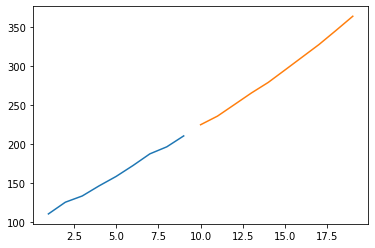

In [20]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)